In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import norm
from sklearn.metrics import mean_squared_error
import scipy
import scipy.stats
from scipy.optimize import curve_fit
from pylab import exp
from scipy import optimize
from math import sqrt
import glob
import h5py   
import pandas as pd


In [2]:
a=glob.glob("/home/pixel/Documents/Master_Thesis_Douwe_Nobels/Measurements/attenuator_test_3V_W70ns/*")
#get all the file names out of the folder
a=sorted(a) #sort so we have it in order of measurements
a[0]

'/home/pixel/Documents/Master_Thesis_Douwe_Nobels/Measurements/attenuator_test_3V_W70ns/0V_attenuator_00001.h5'

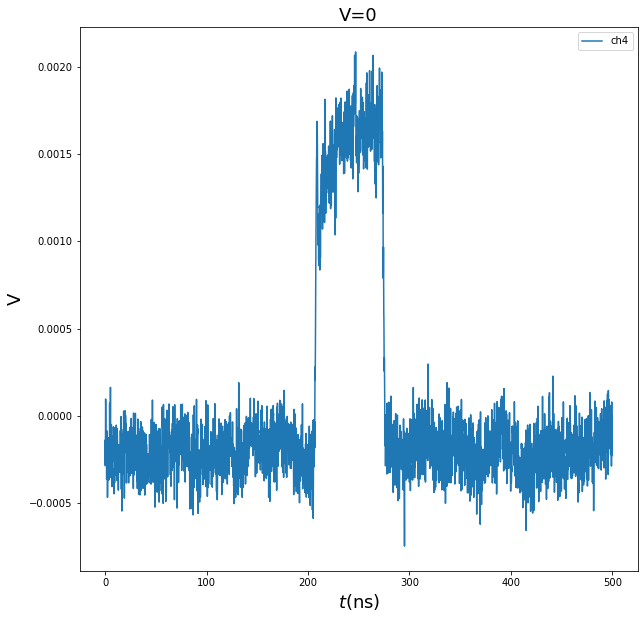

In [3]:
f = h5py.File(a[-1],'r')
dset= f['Waveforms']
x= dset["Channel 4"]
y=x["Channel 4Data"]
y= np.array(y)
arr= np.linspace(0,500, 8001)

fig = plt.figure(figsize=(10,10))
plt.plot(arr,y, label="ch4")

plt.legend()
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("$t$(ns)",fontsize=18)
plt.title("V=0",fontsize=18)
plt.ylabel("V",fontsize=18)
plt.show()



In [4]:
def deltat(ch1):
    half1= max(ch1)/4 #get the height of the rise
    i=0
    while ch1[i]<half1: #get the time stamp of when ch1 gets to rise
        i=i+1
    t1= arr[i]
    j= i
    while ch1[j]>half1: #get the time stamp of when ch2 gets to decline
        j=j+1
    t1= arr[i]
    t2= arr[j]
    return t1,t2

In [5]:
%%time
pmean=[]
temp=[]
for i in range(len(a)):
    if i==0:
        f = h5py.File(a[i],'r')
        dset= f['Waveforms']
        x= dset["Channel 4"]
        y=x["Channel 4Data"]
        temp.append(np.mean(y[3410:4400]))
    elif a[i][0:90]==a[i-1][0:90]:
        if i>=34000:
            f = h5py.File(a[i],'r')
            dset= f['Waveforms']
            x= dset["Channel 4"]
            y=x["Channel 4Data"]
            temp.append(np.mean(y[3700:3900]))
        else:
            f = h5py.File(a[i],'r')
            dset= f['Waveforms']
            x= dset["Channel 4"]
            y=x["Channel 4Data"]
            temp.append(np.mean(y[3410:4400]))
    else:   
        pmean.append(temp)
        temp=[]
        if i>=34000:
            f = h5py.File(a[i],'r')
            dset= f['Waveforms']
            x= dset["Channel 4"]
            y=x["Channel 4Data"]
            temp.append(np.mean(y[3700:3900]))
        else:
            f = h5py.File(a[i],'r')
            dset= f['Waveforms']
            x= dset["Channel 4"]
            y=x["Channel 4Data"]
            temp.append(np.mean(y[3410:4400]))


CPU times: user 19.4 s, sys: 936 ms, total: 20.3 s
Wall time: 20.3 s


In [6]:
std=[]
means=[]
for i in range(len(pmean)):
    std.append(np.std(pmean[i]))
    means.append(np.mean(pmean[i]))
    
inc = abs(min(means))

for i in range(len(means)):
    means[i]= means[i]+inc


In [7]:
std0= np.std(temp)
mean0= np.mean(temp) + inc

In [8]:
f = h5py.File(a[-1],'r')
dset= f['Waveforms']
x= dset["Channel 4"]
y=x["Channel 4Data"]
y= np.array(y)

np.mean(y[3410:4400])

0.0015787731

In [9]:
x=np.arange(0,3.1,0.2)
x=x.tolist()
x.append(5)


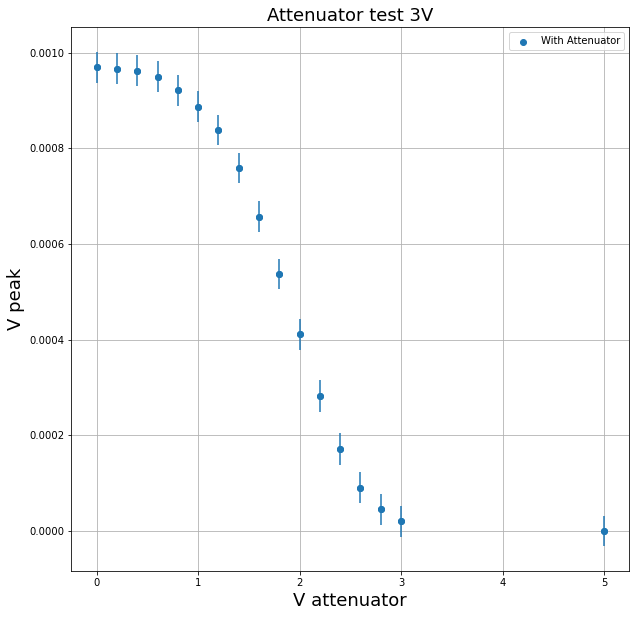

In [10]:
fig = plt.figure(figsize=(10,10))
plt.scatter(x,means, label="With Attenuator")
plt.errorbar(x,means, yerr=std, fmt="o")
plt.legend()
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("V attenuator",fontsize=18)
plt.title("Attenuator test 3V",fontsize=18)
plt.ylabel("V peak",fontsize=18)
plt.grid()
plt.show()

In [11]:
def percent(num1, num2):
    return num1/num2*100

In [12]:
permean=[]
perstd=[]
for i  in range(len(means)):
    permean.append(percent(means[i],means[0]))
    perstd.append(percent(std[i],means[0]))


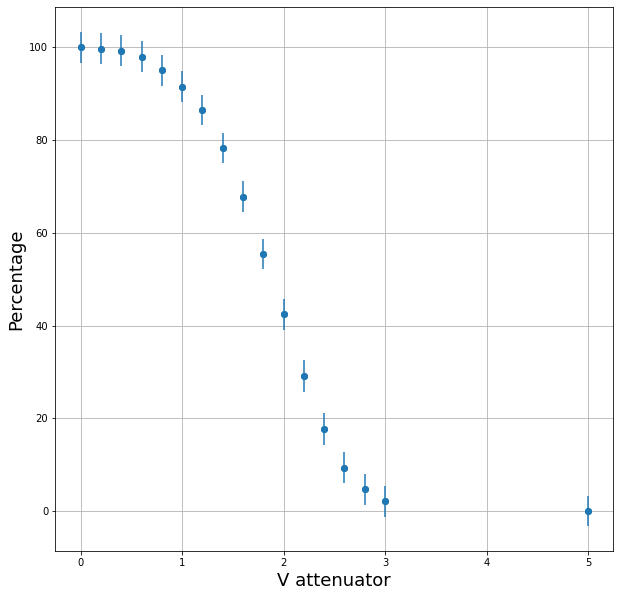

In [13]:
fig = plt.figure(figsize=(10,10))
plt.scatter(x,permean)
plt.errorbar(x,permean, yerr=perstd, fmt="o")
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("V attenuator",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.grid()
plt.show()